In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download data
tickers = ['^GSPC', '^IXIC', '^DJI']
data = yf.download(tickers, start="2015-01-01", end="2024-09-27")

# Calculate daily returns
returns = data['Adj Close'].pct_change()

# Calculate rolling 30-day volatility
volatility = returns.rolling(window=30).std() * np.sqrt(252)  # Annualized

[*********************100%***********************]  3 of 3 completed


In [14]:
volatility

Ticker,^DJI,^GSPC,^IXIC
Date,,,
2015-01-02 00:00:00+00:00,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,NaN,NaN,NaN
2015-01-06 00:00:00+00:00,NaN,NaN,NaN
2015-01-07 00:00:00+00:00,NaN,NaN,NaN
2015-01-08 00:00:00+00:00,NaN,NaN,NaN
...,...,...,...
2024-09-20 00:00:00+00:00,0.105590,0.141613,0.213900
2024-09-23 00:00:00+00:00,0.105579,0.141452,0.213785
2024-09-24 00:00:00+00:00,0.104179,0.141291,0.213973


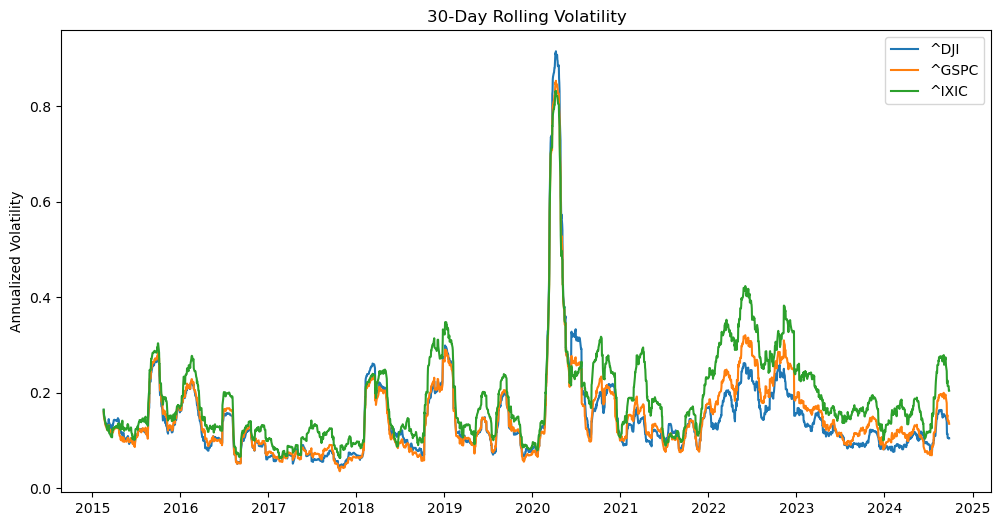

In [15]:
plt.figure(figsize=(12, 6))
for col in volatility.columns:
    plt.plot(volatility.index, volatility[col], label=col)
plt.title('30-Day Rolling Volatility')
plt.legend()
plt.ylabel('Annualized Volatility')
plt.show()

<Figure size 1200x600 with 0 Axes>

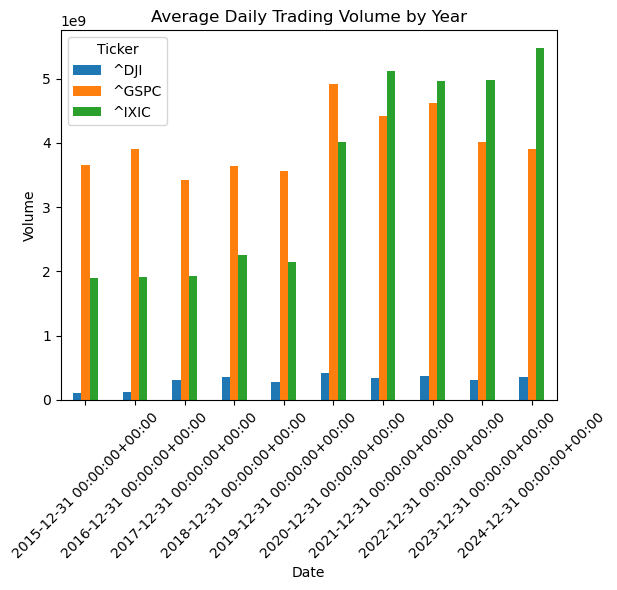

In [16]:
# Calculate average daily volume by year
annual_volume = data['Volume'].resample('Y').mean()

plt.figure(figsize=(12, 6))
annual_volume.plot(kind='bar')
plt.title('Average Daily Trading Volume by Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

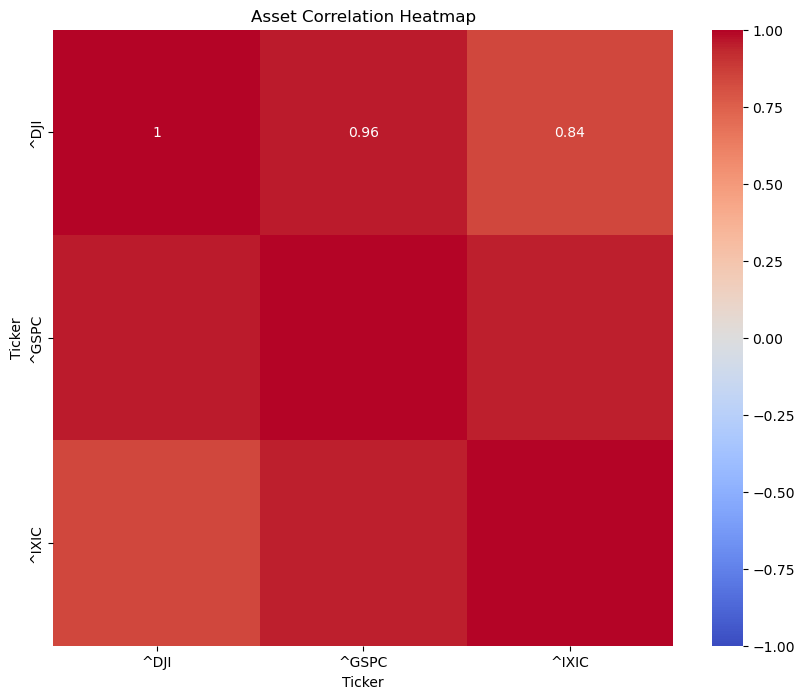

In [17]:
# Calculate correlation of returns
correlation = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Asset Correlation Heatmap')
plt.show()

In [18]:
correlation

Ticker,^DJI,^GSPC,^IXIC
Ticker,,,
^DJI,1.000000,0.955949,0.840279
^GSPC,0.955949,1.000000,0.947055
^IXIC,0.840279,0.947055,1.000000


### New

# 1. Volatility Analysis (Rolling Standard Deviation of Returns)

In [ ]:
# libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Download historical market data for NASDAQ, S&P 500, and DJIA
tickers = ['^IXIC', '^GSPC', '^DJI']  # NASDAQ, S&P 500, and DJIA ticker symbols
data = yf.download(tickers, start='2015-01-01', end='2024-10-04')['Adj Close']

# Calculate daily returns for each index
returns = data.pct_change()

# Compute the rolling standard deviation (volatility) with a 30-day window
volatility = returns.rolling(window=30).std()

[*********************100%***********************]  3 of 3 completed


In [35]:

# Calculate daily returns
returns = data.pct_change().dropna()

# Volatility Analysis (Rolling 30-day volatility)
volatility = returns.rolling(window=30).std() * np.sqrt(252)

# Liquidity Analysis (Daily trading volume - approximate)
volume = yf.download(tickers, start="2015-01-01", end="2024-10-04")['Volume']


[*********************100%***********************]  3 of 3 completed


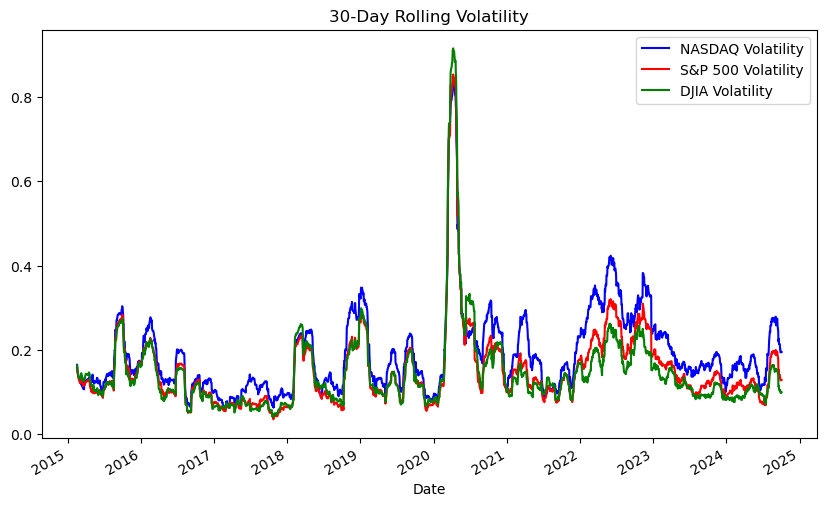

In [36]:
# Plot the volatility for each index
plt.figure(figsize=(10, 6))
volatility['^IXIC'].plot(label='NASDAQ Volatility', color='blue')
volatility['^GSPC'].plot(label='S&P 500 Volatility', color='red')
volatility['^DJI'].plot(label='DJIA Volatility', color='green')
plt.title('30-Day Rolling Volatility')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

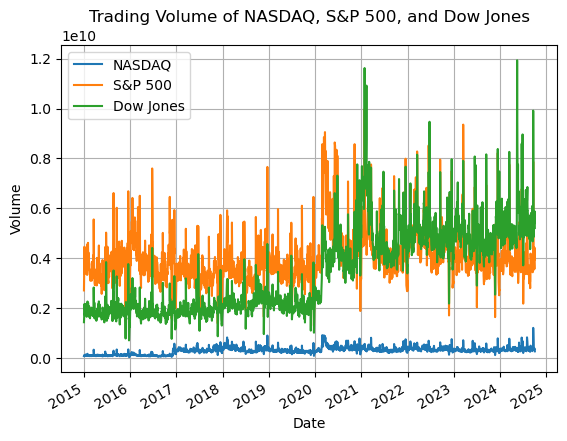

In [37]:
# Plotting the Trading Volume (Liquidity Proxy)
plt.figure(figsize=(10,6))
volume.plot(title='Trading Volume of NASDAQ, S&P 500, and Dow Jones')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(['NASDAQ', 'S&P 500', 'Dow Jones'])
plt.grid(True)
plt.show()

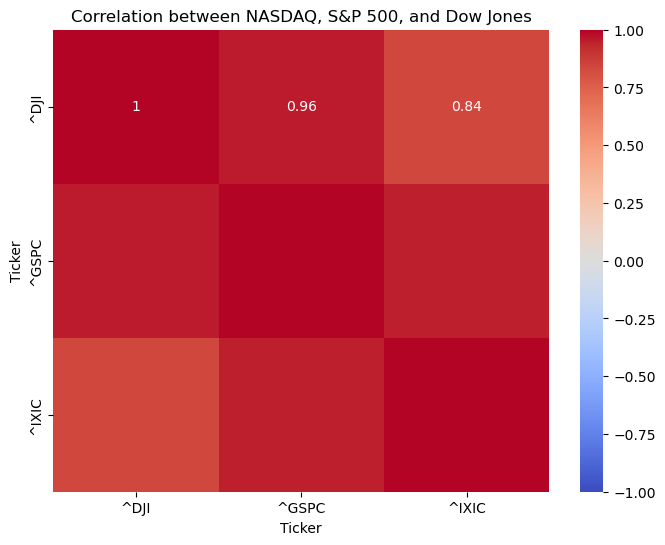

In [38]:
# Plotting the Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between NASDAQ, S&P 500, and Dow Jones')
plt.show()

In [39]:
# Summary of Volatility, Liquidity, and Correlation
print("Volatility (Annualized Standard Deviation):")
volatility.tail()

Volatility (Annualized Standard Deviation):


Ticker,^DJI,^GSPC,^IXIC
Date,,,
2024-09-27 00:00:00+00:00,0.098414,0.128081,0.194410
2024-09-30 00:00:00+00:00,0.098414,0.128369,0.194556
2024-10-01 00:00:00+00:00,0.098702,0.129323,0.196297
2024-10-02 00:00:00+00:00,0.098410,0.129097,0.196025
2024-10-03 00:00:00+00:00,0.099684,0.128825,0.195347


In [40]:
print("\nCorrelation Matrix:")
correlation


Correlation Matrix:


Ticker,^DJI,^GSPC,^IXIC
Ticker,,,
^DJI,1.000000,0.955847,0.840112
^GSPC,0.955847,1.000000,0.947050
^IXIC,0.840112,0.947050,1.000000


In [41]:
# Additional Granger Causality Test Example for Volatility and Liquidity (Optional)
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test for NASDAQ's volume causing volatility (example)
print("\nGranger Causality Test (NASDAQ Volume -> NASDAQ Volatility):")
test_result = grangercausalitytests(
    pd.concat([volume['^IXIC'], volatility['^IXIC']], axis=1).dropna(), maxlag=5
)


Granger Causality Test (NASDAQ Volume -> NASDAQ Volatility):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7724  , p=0.0093  , df_denom=2421, df_num=1
ssr based chi2 test:   chi2=6.7808  , p=0.0092  , df=1
likelihood ratio test: chi2=6.7713  , p=0.0093  , df=1
parameter F test:         F=6.7724  , p=0.0093  , df_denom=2421, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7987  , p=0.0611  , df_denom=2418, df_num=2
ssr based chi2 test:   chi2=5.6089  , p=0.0605  , df=2
likelihood ratio test: chi2=5.6024  , p=0.0607  , df=2
parameter F test:         F=2.7987  , p=0.0611  , df_denom=2418, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1316  , p=0.0942  , df_denom=2415, df_num=3
ssr based chi2 test:   chi2=6.4133  , p=0.0931  , df=3
likelihood ratio test: chi2=6.4048  , p=0.0935  , df=3
parameter F test:         F=2.1316  , p=0.0942  , df_denom=2415, df_num=3

Granger Causality
number 